*********** Importing the Dataset ************

You can begin by using the Generative AI model to create a python script that can load the dataset to a pandas dataframe. The dataset file already has the headers in the first row.

Write the prompt to generate the said code and test it in the JupyterLite environment. For verification of appropriate loading, include a step for printing the first 5 values of the loaded dataframe.

Write a Python code that can perform the following tasks.
1. Read the CSV file, located on a given file path, into a pandas data frame, assuming that the first row of the file can be used as the headers for the data.
2. Print the first 5 rows of the dataframe to verify correct loading.

In [212]:
import pandas as pd
from sklearn.linear_model import Ridge
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')

# Load the data from the URL
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMSkillsNetwork-AI0271EN-SkillsNetwork/labs/v1/m3/data/used_car_price_analysis.csv"
df = pd.read_csv(url)

In [213]:
print(df.head(10))

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
5   Fiesta  2015       Manual    35432   Petrol  145.0  47.9         1.6   
6     Puma  2019       Manual     2029   Petrol  145.0  50.4         1.0   
7   Fiesta  2017       Manual    13054   Petrol  145.0  54.3         1.2   
8     Kuga  2019    Automatic     6894   Diesel  145.0  42.2         2.0   
9    Focus  2018       Manual    48141   Petrol  145.0  61.4         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
5  10500  
6  22500  
7   9000  
8  25500  
9  10000  


********** Data Preparation *************

I. Data Cleaning

At this stage, it is required to clean up the data. As has been informed to you, the data may have missing values and duplicate entries. Write a prompt that performs the following tasks

1. Identifies the columns with missing values and fills the blank cells with average value of the columns.
2. Identifies and drops the duplicate entries from the data.

Write a python code that performs the following tasks:
1. Identify the columns of a data frame with missing values.
2. Replace the missing values thus identified with mean value of the column.
3. Deletes the duplicate entries from the data frame.

In [214]:
# Identify the columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Replace missing values with the mean value of the column
for column in columns_with_missing_values:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Delete duplicate entries from the data frame
df.drop_duplicates(inplace=True)

In [215]:
print(df.head(10))

     model  year transmission  mileage fuelType    tax   mpg  engineSize  \
0   Fiesta  2017    Automatic    15944   Petrol  150.0  57.7         1.0   
1    Focus  2018       Manual     9083   Petrol  150.0  57.7         1.0   
2    Focus  2017       Manual    12456   Petrol  150.0  57.7         1.0   
3   Fiesta  2019       Manual    10460   Petrol  145.0  40.3         1.5   
4   Fiesta  2019    Automatic     1482   Petrol  145.0  48.7         1.0   
5   Fiesta  2015       Manual    35432   Petrol  145.0  47.9         1.6   
6     Puma  2019       Manual     2029   Petrol  145.0  50.4         1.0   
7   Fiesta  2017       Manual    13054   Petrol  145.0  54.3         1.2   
8     Kuga  2019    Automatic     6894   Diesel  145.0  42.2         2.0   
9    Focus  2018       Manual    48141   Petrol  145.0  61.4         1.0   

   price  
0  12000  
1  14000  
2  13000  
3  17500  
4  16500  
5  10500  
6  22500  
7   9000  
8  25500  
9  10000  


II. Data Augmentation (optional)
Once cleaned, you may choose to augment this dataset with additional samples, created synthetically using Mostly.ai.

********* Data Insights and Visualization ************

Write prompts that generate codes to prform the following actions.

1.Identify the 5 attributes that have the highest correlation with the price parameter.
Write a python code that identifies the top 5 attributes with highest correlation with the target attribute in a data frame.

In [216]:
# drop columns do not have numeric values
print("General information of the data set: number of columns, data types, total entries \n")
df.info()


print("\n Summary of the data set : total entries, mean values, standard deviation, max, min values ... etc")
df.describe()

General information of the data set: number of columns, data types, total entries 

<class 'pandas.core.frame.DataFrame'>
Index: 17812 entries, 0 to 17965
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         17812 non-null  object 
 1   year          17812 non-null  int64  
 2   transmission  17812 non-null  object 
 3   mileage       17812 non-null  int64  
 4   fuelType      17812 non-null  object 
 5   tax           17812 non-null  float64
 6   mpg           17812 non-null  float64
 7   engineSize    17812 non-null  float64
 8   price         17812 non-null  int64  
dtypes: float64(3), int64(3), object(3)
memory usage: 1.4+ MB

 Summary of the data set : total entries, mean values, standard deviation, max, min values ... etc


,year,mileage,tax,mpg,engineSize,price
count,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000,17812.000000
mean,2016.862396,23381.146362,113.314731,57.908696,1.350623,12269.556310
std,2.052039,19419.011045,62.034599,10.132696,0.432581,4736.285417
min,1996.000000,1.000000,0.000000,20.800000,0.000000,495.000000
25%,2016.000000,10000.000000,30.000000,52.300000,1.000000,8999.000000
50%,2017.000000,18277.000000,145.000000,58.900000,1.200000,11288.000000
75%,2018.000000,31098.500000,145.000000,65.700000,1.500000,15295.000000
max,2060.000000,177644.000000,580.000000,201.800000,5.000000,54995.000000


In this data set, there are two types of features: 
- Categorical features: model, transmission, fuelType

- Numerical features: year, mileage , tax , mpg, engineSize, price

Let dive into details of these features

1. Numerical features: year, mileage , tax , mpg, engineSize, price

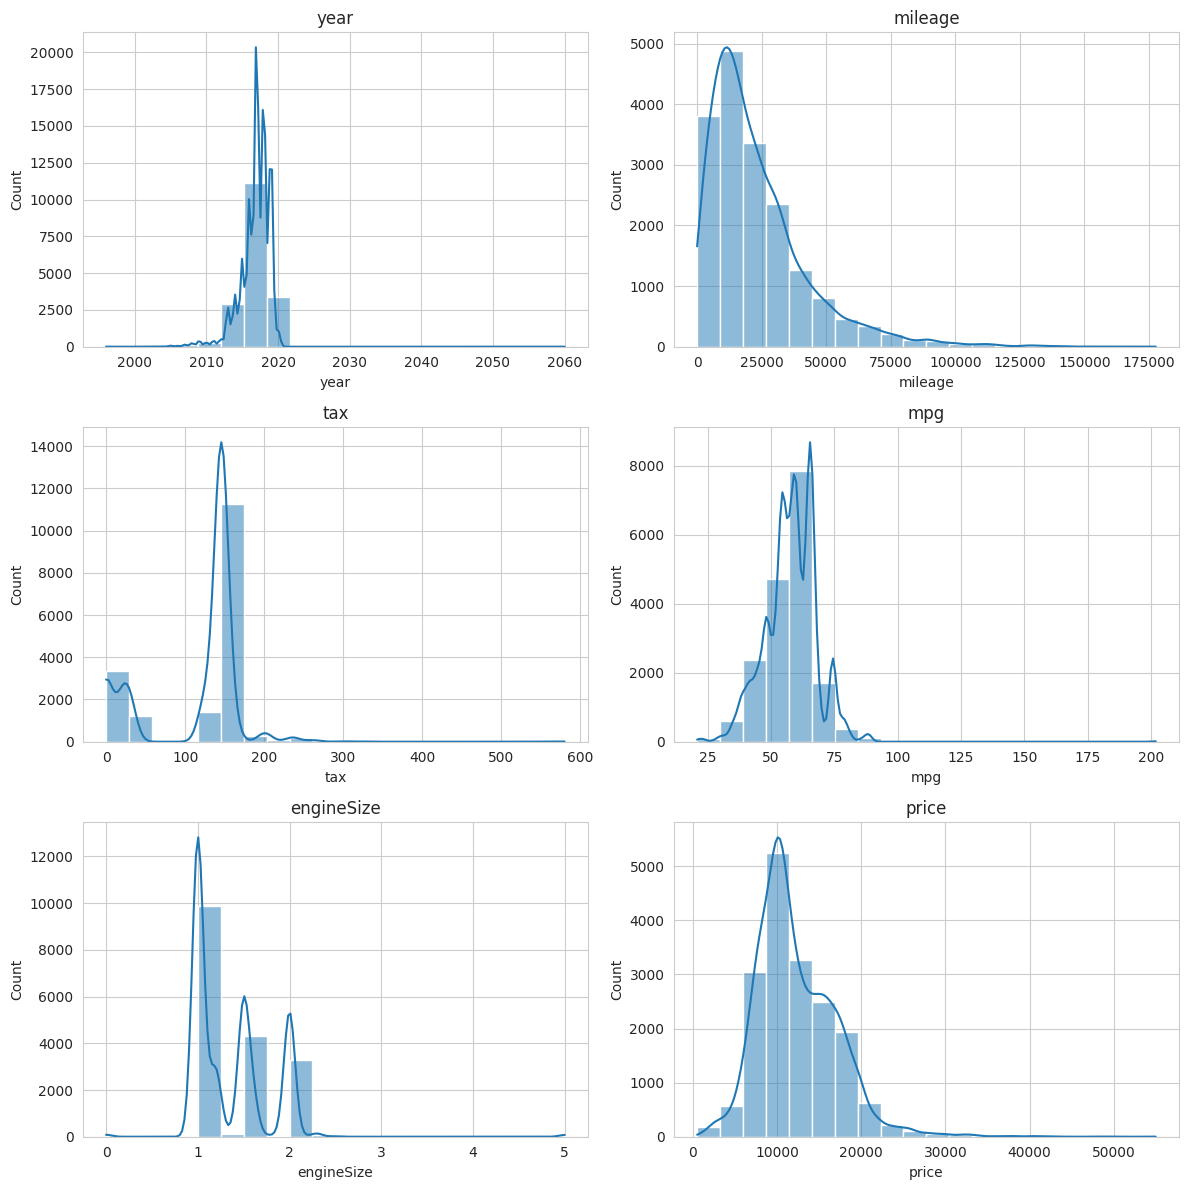

In [217]:
# Distribution of Numerical Features
numerical_features = ['year', 'mileage', 'tax', 'mpg', 'engineSize', 'price']

plt.figure(figsize=(12, 12))
for feature in numerical_features:
    plt.subplot(3, 2, numerical_features.index(feature) + 1)
    sns.histplot(data=df[feature], bins=20, kde=True)
    plt.title(feature)
plt.tight_layout()
plt.show()

Based on the correlation matrix displayed by the heatmap, the we see that the car years are highly correlated to the price. The tax and engine size also significantly impact on the price. 

year          0.635715
engineSize    0.411451
tax           0.405970
mpg          -0.346263
mileage      -0.530483
Name: price, dtype: float64


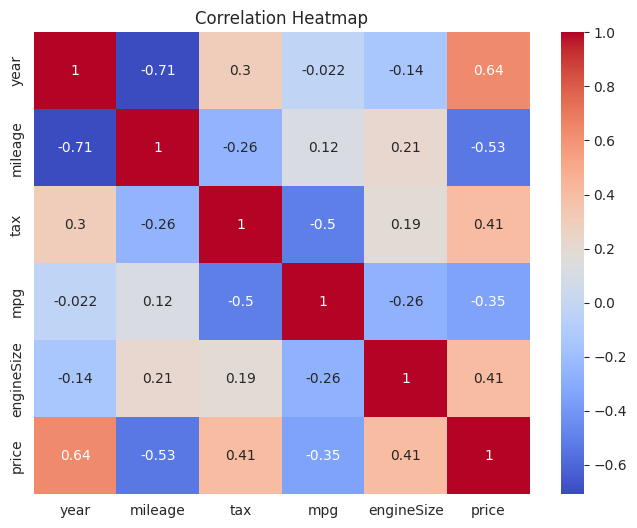

In [218]:
# Correlation Analysis
correlation_matrix = df[numerical_features].corr()

# Sort the correlation values with the target attribute in descending order
correlation_with_target = correlation_matrix["price"].sort_values(ascending=False)

# Get the top 5 attributes with the highest correlation with the target attribute
top_5_correlated_attributes = correlation_with_target[1:6]  # Excludes the target attribute itself

print(top_5_correlated_attributes)


plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

2. Count the number of cars under each unique value of Model attribute.

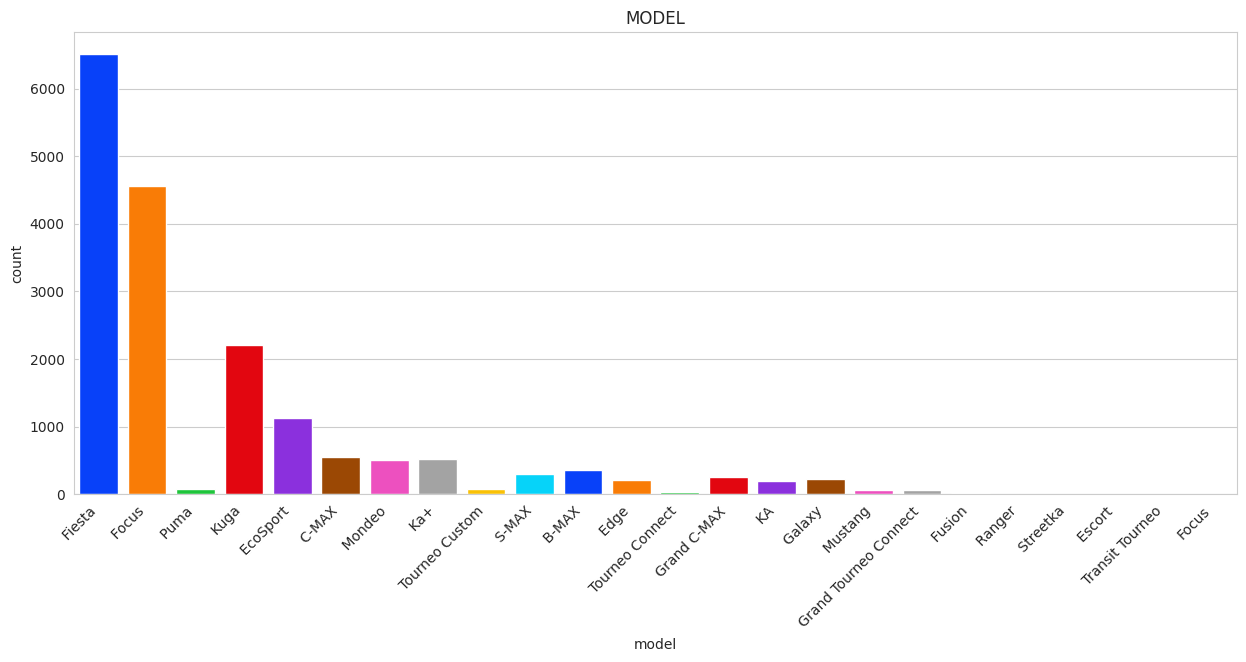

In [219]:
plt.figure(figsize=(15, 6))
sns.countplot(x='model', data=df, palette='bright', saturation=0.95)
plt.title('MODEL')
plt.xticks(rotation=45, ha="right")
plt.show()

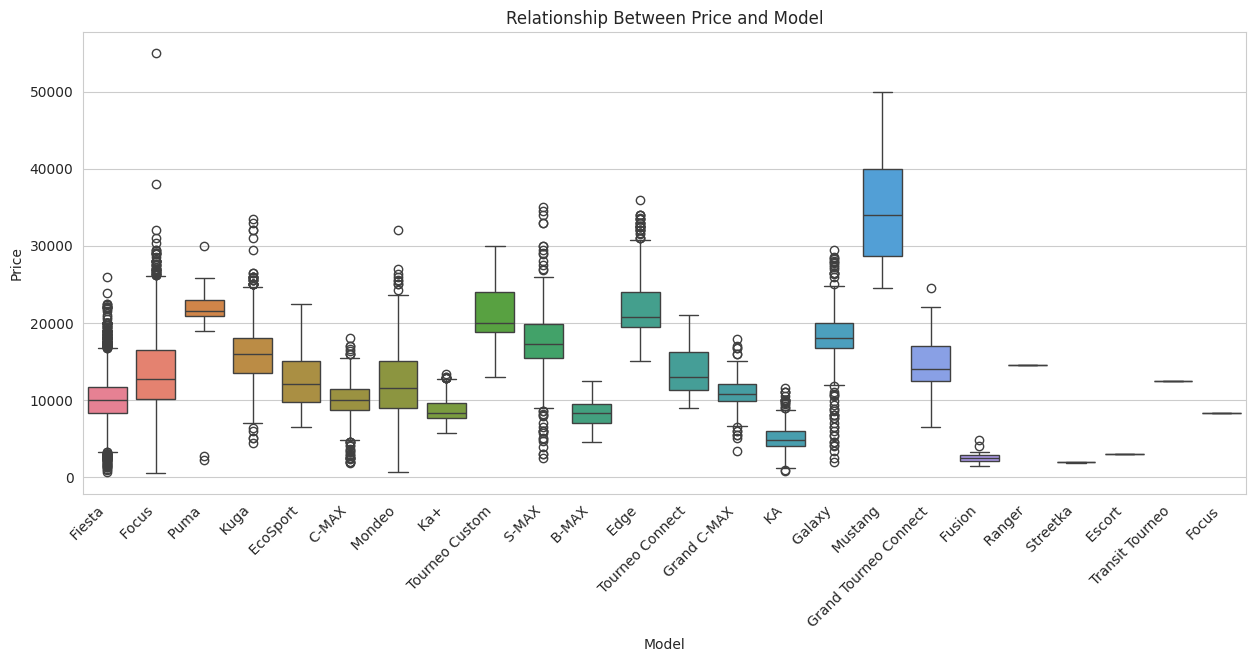

In [220]:
plt.figure(figsize=(15, 6))

# Create a box plot to visualize the relationship between price and model
sns.boxplot(x="model", y="price", data=df, palette= "husl")

# Rotate x-axis labels for better readability if there are many models
plt.xticks(rotation=45, ha="right")

# Set the title and labels
plt.title("Relationship Between Price and Model")
plt.xlabel("Model")
plt.ylabel("Price")

# Show the plot
plt.show()

3. Count the number of cars under each unique value of fuelType attribute.

fuelType
Petrol      12081
Diesel       5706
Hybrid         22
Electric        2
Other           1
Name: count, dtype: int64


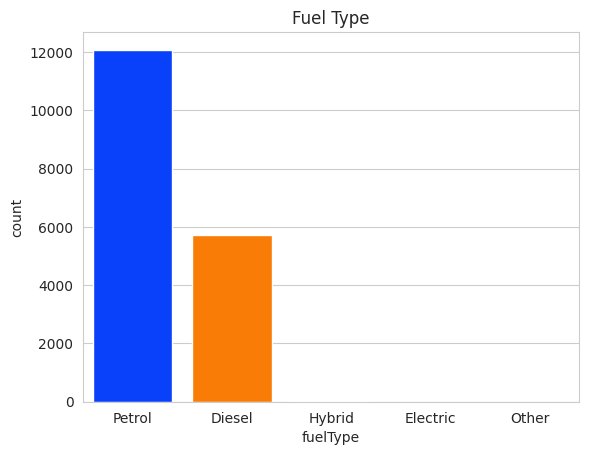

In [221]:
count = df['fuelType'].value_counts()
print(count)

sns.countplot(x='fuelType', data=df, palette='bright', saturation=0.95)
plt.title('Fuel Type')
plt.show()

4. Count the number of cars under each unique value of Transmission attribute.

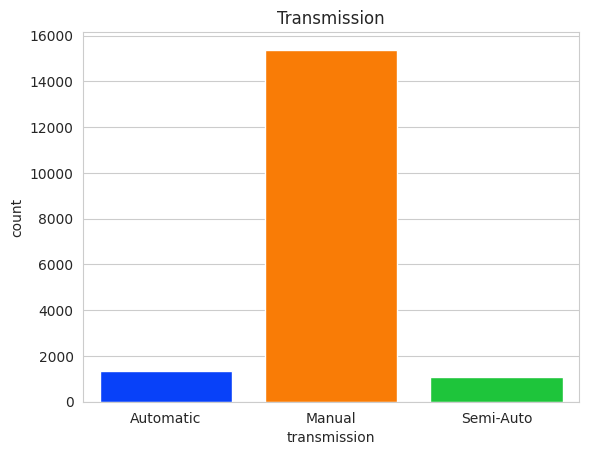

In [222]:
sns.countplot(x='transmission', data=df, palette='bright', saturation=0.95)
plt.title('Transmission')
plt.show()

5. Create a Box plot to determine whether cars with automatic, manual or semi-auto type of transmission have more price outliers. Use the Seaborn library for creating the plot.

From the plot below, we see that:
- Manual cars have highest price outliers whereas semi-auto cars have lowest price outliers.
- Manual cars are the cheapest, while automatic cars are the most expensive
- Automatic cars' prices have broadest range, where 25% of the cars' price varies from ~$1000 to ~$11000, the next 25% cars' price go from ~11000 to ~$16000, the next 25% cars' price range from ~%16000 to ~$19000, and the remaining 25% price from ~19000 to ~$30000.
- The auto-semi cars' price have assymmetric distribution, when the first 50% price starting from ~$5000 to ~$15000, the rest 50% cars' price increase from ~$15000 to ~$29000.

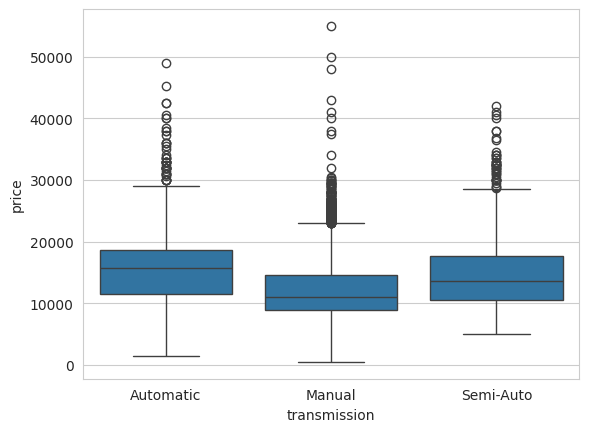

In [223]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x='transmission', y='price', data=df)

# Display the plot
plt.show()

6. Generate the regression plot between mpg (miles per gallon) parameter and the price to determine the correlation type between the two.

The 3rd degree polynomial has been used to fit the data, there are a few outlier data points lay on the value mpg=200. 
From the plot, regardless the outliers, we see as the mpg increases, the cars' price decrease. 

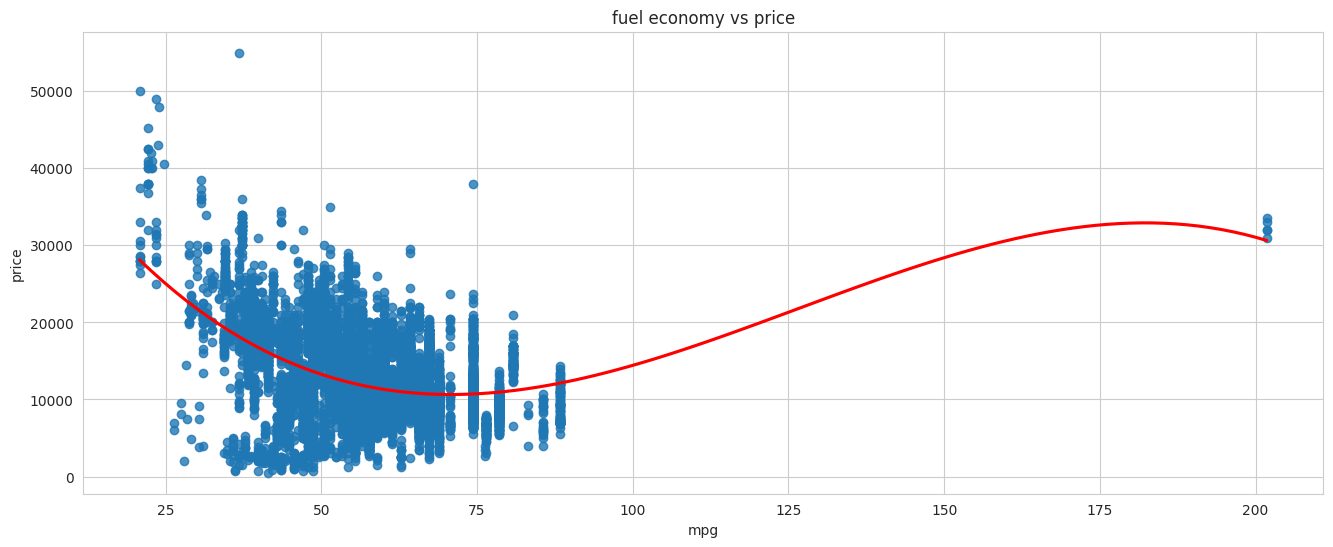

In [224]:
# Create a regression plot using Seaborn
plt.figure(figsize=(16,6))
plt.title('fuel economy vs price')
sns.regplot( data=df, x='mpg', y='price', order=3, line_kws=dict(color="r"), ci=None)
sns.set_style('whitegrid') 
# Display the plot
plt.show()

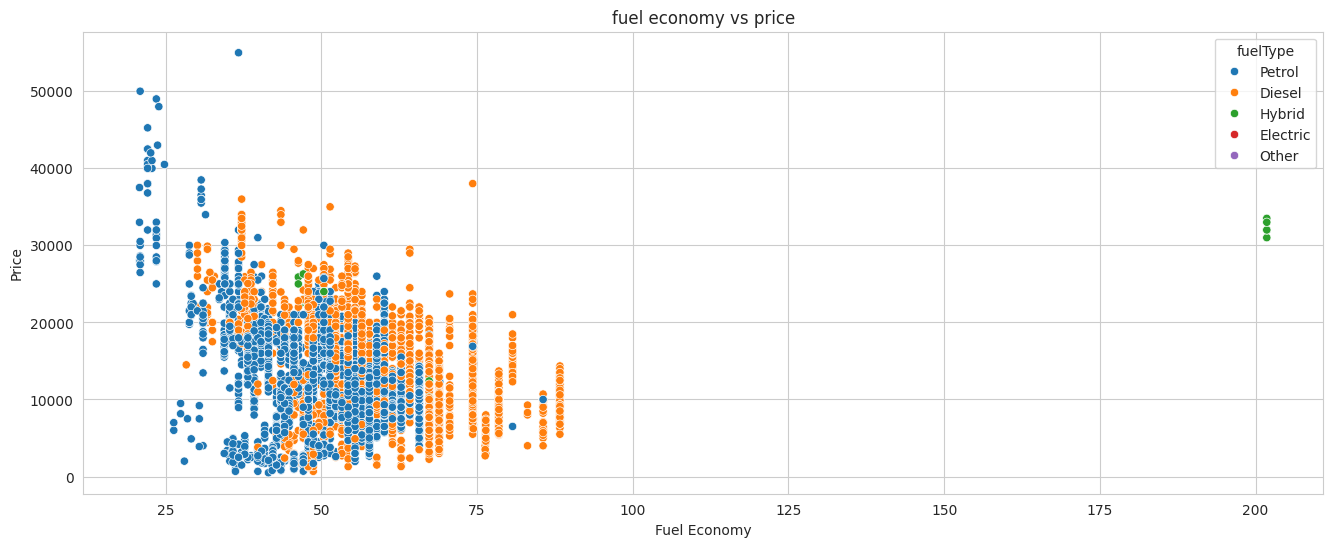

In [225]:
plt.figure(figsize=(16,6))
plt.title('fuel economy vs price')
sns.scatterplot(x=df['mpg'], y=df['price'], hue=df['fuelType'])
plt.xlabel('Fuel Economy')
plt.ylabel('Price')
plt.show()

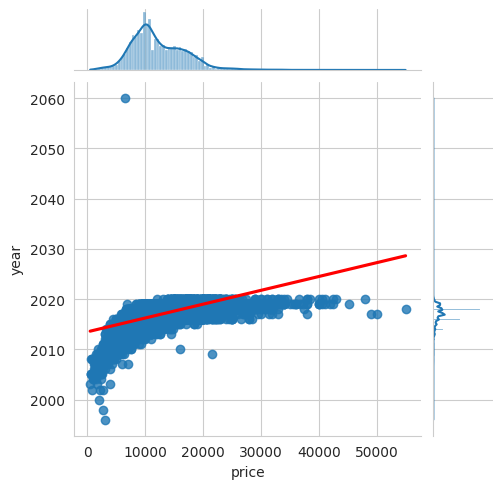

In [226]:
sns.jointplot(x='price', y='year', data=df,line_kws=dict(color="r"), ci=None , kind="reg", height=5, ratio=5)

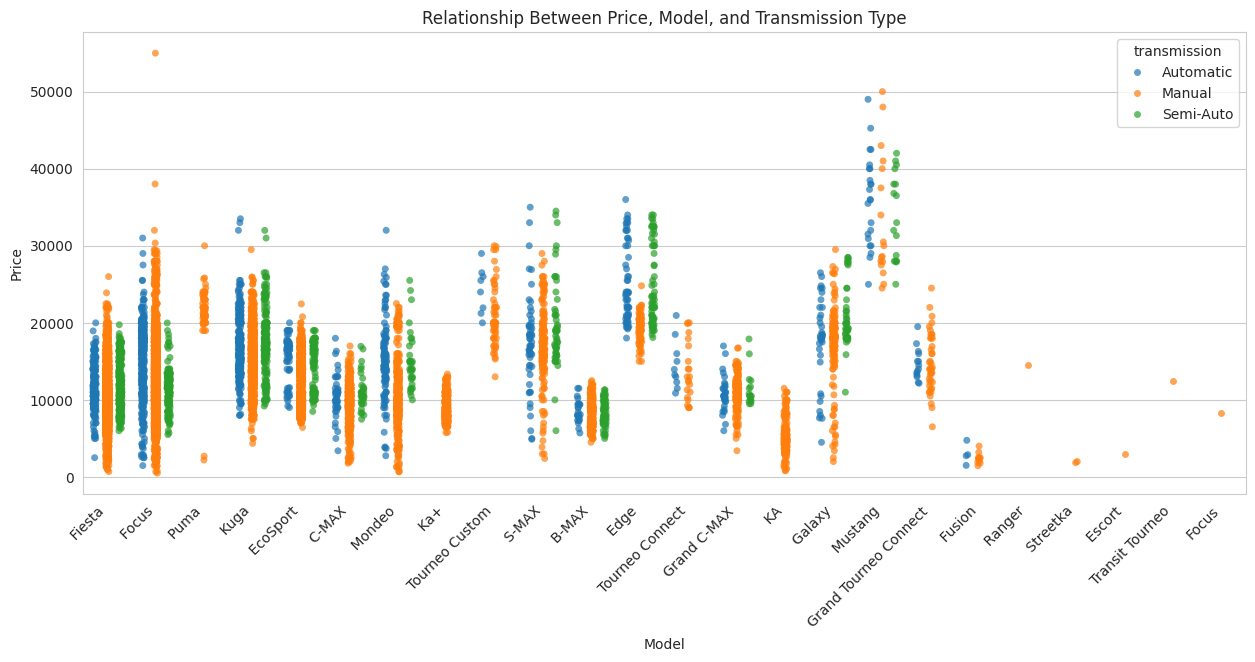

In [227]:
# Set the plot size for better visibility
plt.figure(figsize=(15, 6))

# Create a strip plot to visualize the relationship between price, model, and transmission
sns.stripplot(x="model", y="price", hue="transmission", data=df, jitter=True, dodge=True, alpha=0.7)

# Rotate x-axis labels for better readability if there are many models
plt.xticks(rotation=45, ha="right")

# Set the title and labels
plt.title("Relationship Between Price, Model, and Transmission Type")
plt.xlabel("Model")
plt.ylabel("Price")

# Show the plot
plt.show()

*********** Model Development and Evaluation **************

Write prompts that generate codes to perform the following actions.

1. Fit a linear regression model to predict the price using the feature 'mpg'. Then calculate the R^2 and MSE values for the model.

The results of R2 score (low) and MSE (high) shown below indicate linear regression model gives a poor prediction performance.

In [228]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Separate the source and target variables
X = df[['mpg']]
y = df['price']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate R^2 value
r2_linearReg = r2_score(y, predictions)

# Calculate Mean Squared Error (MSE)
mse_linearReg = mean_squared_error(y, predictions)

print("R^2 value:", r2_linearReg)
print("Mean Squared Error:", mse_linearReg)

R^2 value: 0.11989802249624182
Mean Squared Error: 19741690.80944619


2. Fit a linear regression model to predict the price using the following set of 5 features:

year, mileage, tax, mpg and engineSize.
Calculate the R^2 and MSE values for this model.

Combine 5 features together for the price prediction, linear regressor perframce better than just one festure.
This is proved by R2 score goes up from 0.11 to 0.72. And the MSE does down from 19741690.80944619 to 6134065.224381637.

In [229]:
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Calculate R^2 value
r2_linearReg5 = r2_score(y, predictions)

# Calculate Mean Squared Error (MSE)
mse_linearReg5 = mean_squared_error(y, predictions)

print("R^2 value:", r2_linearReg5)
print("Mean Squared Error:", mse_linearReg5)

R^2 value: 0.7265379654547046
Mean Squared Error: 6134065.224381637


3. For the same set of features as in the question above, create a pipeline model object that uses standard scalar, second degree polynomial features and a linear regression model. Calculate the R^2 value and the MSE value for this model.

Ultilizing pipeline model has improve the price prediction, by enhance the R2 score and reduce MSE.

In [230]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Separate the source and target variables
X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Create a pipeline with StandardScaler, PolynomialFeatures, and LinearRegression
pipeline = Pipeline([
    ('scaler', StandardScaler()), # standardize all features in the data set to the standard normally distributed data (e.g. Gaussian with 0 mean and unit variance), to make sure they all behave the relatively the same.
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])

# Fit the pipeline
pipeline.fit(X, y)

# Make predictions
predictions = pipeline.predict(X)

# Calculate R^2 value
r2_pipeline = r2_score(y, predictions)

# Calculate Mean Squared Error (MSE)
mse_pipeline = mean_squared_error(y, predictions)

print("R^2 value:", r2_pipeline)
print("Mean Squared Error:", mse_pipeline)

R^2 value: 0.7666619695239302
Mean Squared Error: 5234038.065462741


4. For the same set of features, split the data into training and testing data parts. Assume testing part to be 20%. Create and fit a Ridge regression object using the training data, set the regularization parameter to 0.1, and calculate the R^2 using the test data.

Using Ridge regression can avoid overfitting the data set by introducing the regularization parameter 'alpha'

In [244]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit a Ridge regression model with regularization parameter set to 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train, y_train)

# Make predictions on the testing data
predictions = ridge_model.predict(X_test)

# Calculate R^2 value
r2_ridge = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse_ridge = mean_squared_error(y_test, predictions)

print("R^2 value:", r2_ridge)
print("Mean Squared Error:", mse_ridge)

R^2 value: 0.6921434099294765
Mean Squared Error: 6903084.665895218


5. Perform a second order polynomial transform on both the training data and testing data created for the question above. 

Create and fit a Ridge regression object using the modified training data, set the regularisation parameter to 0.1, and calculate the R^2 and MSE utilising the modified test data.

In [250]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error

X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and fit a Ridge regression model with regularization parameter set to 0.1
ridge_model = Ridge(alpha=0.1)
ridge_model.fit(X_train_poly, y_train)

# Make predictions on the testing data
predictions = ridge_model.predict(X_test_poly)

# Calculate R^2 value
r2_ridge_polyscale = r2_score(y_test, predictions)

# Calculate Mean Squared Error (MSE)
mse_ridge_polyscale = mean_squared_error(y_test, predictions)

print("R^2 value:", r2_ridge_polyscale)
print("Mean Squared Error:", mse_ridge_polyscale)

R^2 value: 0.6732748726182247
Mean Squared Error: 7326174.879917717


6. In the question above, perform a Grid Search on ridge regression for a set of values of alpha {0.01, 0.1, 1, 10, 100} with 4-fold cross validation to find the optimum value of alpha to be used for the prediction model.

In [263]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import numpy as np


X = df[['year', 'mileage', 'tax', 'mpg', 'engineSize']]
y = df['price']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  

# Apply second degree polynomial scaling to the training and testing data
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create a Ridge regression model
ridge = Ridge()

# Define the grid of parameters to search
param_grid = {'alpha': [0.01, 0.1, 1, 10, 100]}


# Perform Grid Search Cross Validation
grid_search = GridSearchCV(ridge, param_grid, cv=5) #SPlit dataset into 5 subsets (5-folds). Keep 1 subset for testing, 4 subsets for training
grid_search.fit(X_train_poly, y_train)

# Make predictions on the testing data
predictions = grid_search.predict(X_test_poly)

# Calculate R^2 value
r2_ridge_polyscale_grid = r2_score(y_test, predictions) #y_test = y_true 

# Calculate Mean Squared Error (MSE)
mse_ridge_polyscale_grid = mean_squared_error(y_test, predictions)

# mae_ridge_polyscale_grid = mean_absolute_error(y_test, predictions)


print("R^2 value:", r2_ridge_polyscale_grid)
print("Mean Squared Error:", mse_ridge_polyscale_grid)


print("\n The best estimator across ALL searched parameters: \n",grid_search.best_estimator_)
print("\n The best score across ALL searched parameters, i.e cross-validation score fit on training set: \n", grid_search.best_score_) #Mean cross-validated score of the best_estimator
print("\n The best score across ALL searched parameters \n", grid_search.best_params_) #Parameter setting that gave the best results on the hold out data.


R^2 value: 0.3827341050644869
Mean Squared Error: 13840985.938073684

 The best estimator across ALL searched parameters: 
 Ridge(alpha=0.01)

 The best score across ALL searched parameters, i.e cross validation score on training set: 
 0.7743679714581142

 The best score across ALL searched parameters 
 {'alpha': 0.01}


THe grid search best_score is overestimate because it fits on the  training set while doing grid searching

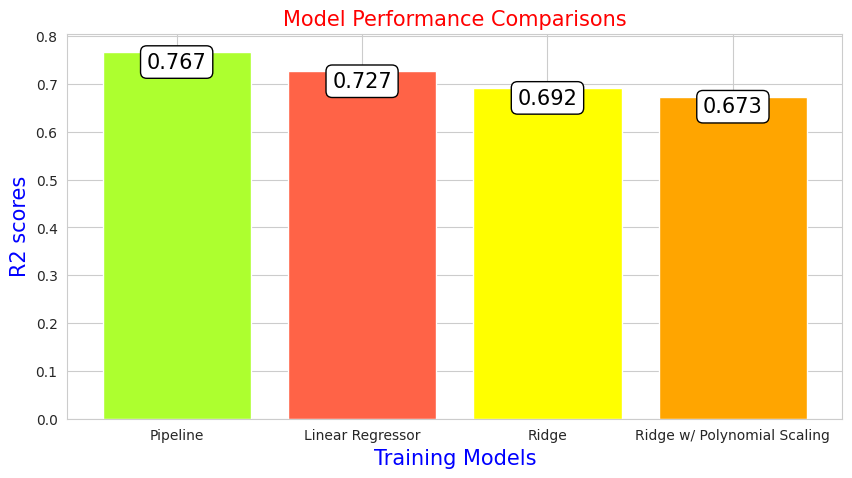

In [237]:
models = [ 'Pipeline', 'Linear Regressor','Ridge', 'Ridge w/ Polynomial Scaling' ]
scores = [r2_pipeline, r2_linearReg5, r2_ridge,  r2_ridge_polyscale]

# set up the bar plot
plt.figure(figsize=(10,5)) ##width, height
plt.bar(models, scores, color=['greenyellow','tomato', 'yellow', 'orange'])

# add title and labels
plt.title('Model Performance Comparisons', fontsize=15, color='red')
plt.xlabel('Training Models',fontsize=15,  color='blue')
plt.ylabel('R2 scores', fontsize=15, color='blue') 

text_kwargs = dict(ha='center', va='top', fontsize=15, color='black')

# add the accuracies as text labels on top of the bars

for i, values in enumerate(scores):
    plt.text(i, values, str(round(values,3)), **text_kwargs, bbox = dict(facecolor='white', edgecolor='black',boxstyle="round"))
# show the plot
plt.show()